### Task 3
Objective: Uncover underlying factors that explain the patterns observed in survey responses related to work pressures.

Dataset: [Airline Passenger Satisfaction Survey](https://www.kaggle.com/code/francoisstamant/eda-and-factor-analysis/input)

Tasks:

1. Data Preparation:

* Load the dataset and focus on the survey items.
* Check for missing values and handle them appropriately.

2. Factor Analysis:

* Determine the number of factors to extract using methods like the Kaiser criterion and scree plot.
* Perform EFA using an appropriate rotation method (e.g., varimax).
* Interpret the factor loadings and name the factors based on the items that load highly on them.

3. Reporting:

* Summarize the findings of your factor analysis.
* Discuss how these factors could be used in further research or practical applications.

***
## Dataset Overview: Customer Satisfaction Survey

The dataset contains information about customer satisfaction and their experiences with an airline, including details about their demographics, flight preferences, and service ratings.

### Key Features:

* **ID:** Unique identifier for each survey respondent
* **Gender:** Gender of the respondent (Male/Female)
* **Customer Type:** Whether the customer is a loyal or disloyal customer
* **Age:** Age of the respondent (in years)
* **Type of Travel:** The purpose of travel (e.g., Business travel, Personal Travel)
* **Class:** The class of the flight (e.g., Business, Economy)
* **Flight Distance:** Distance traveled in the flight (in miles)
* **Inflight wifi service:** Rating of the in-flight Wi-Fi service (scale: 1 to 5)
* **Departure/Arrival time convenient:** Rating of the convenience of departure/arrival times (scale: 1 to 5)
* **Ease of Online booking:** Rating of how easy the online booking process was (scale: 1 to 5)
* **Gate location:** Rating of the gate location convenience (scale: 1 to 5)
* **Food and drink:** Rating of the food and drink quality (scale: 1 to 5)
* **Online boarding:** Rating of the online boarding process (scale: 1 to 5)
* **Seat comfort:** Rating of the seat comfort (scale: 1 to 5)
* **Inflight entertainment:** Rating of the in-flight entertainment (scale: 1 to 5)
* **On-board service:** Rating of the overall on-board service (scale: 1 to 5)
* **Leg room service:** Rating of the leg room service (scale: 1 to 5)
* **Baggage handling:** Rating of the baggage handling service (scale: 1 to 5)
* **Checkin service:** Rating of the check-in service (scale: 1 to 5)
* **Inflight service:** Rating of the overall in-flight service (scale: 1 to 5)
* **Cleanliness:** Rating of the cleanliness of the aircraft (scale: 1 to 5)
* **Departure Delay in Minutes:** Delay in departure time (in minutes)
* **Arrival Delay in Minutes:** Delay in arrival time (in minutes)
* **Satisfaction:** Overall customer satisfaction with the flight 


## Import

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler

## Import

In [2]:
df = pd.read_csv('data/Airline Passenger Satisfaction Survey/train.csv')

# Select only columns with service ratings

In [ ]:
service_columns = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]
df_service = df[service_columns]

In [5]:
print(df_service.isnull().sum())

Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
dtype: int64


The dataset is completely filled

### Standardize the features

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_service)

### Check the suitability for factor analysis

In [21]:
kmo_all, kmo_model = calculate_kmo(X_scaled)
bartlett_chi_square_value, bartlett_p_value = calculate_bartlett_sphericity(X_scaled)

print(f"KMO Score: {kmo_model:.3f}")  # >0.6 is acceptable
print(f"Bartlett's Test p-value: {bartlett_p_value:.3f}")  # <0.05 means suitable

KMO Score: 0.781
Bartlett's Test p-value: 0.000


Dataset suitable for factor analysis

### Create FactorAnalyzer object and find optimal number of factors using eigenvalues

In [22]:
fa = FactorAnalyzer(rotation="varimax")
fa.fit(X_scaled)
ev, v = fa.get_eigenvalues()

### Plot eigenvalues

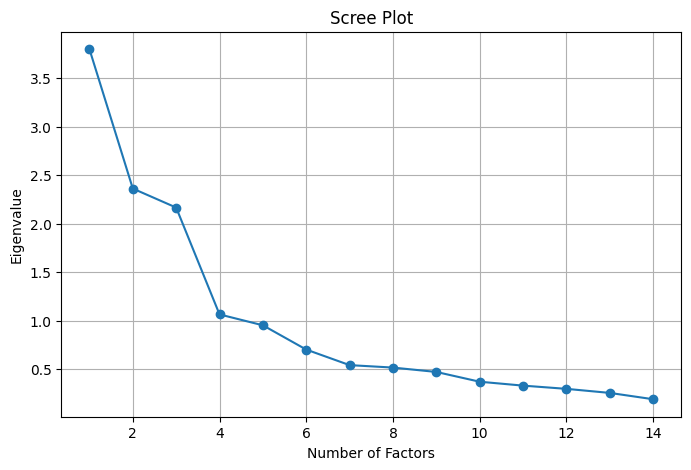

In [23]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

### Select number of factors where eigenvalues > 1

In [24]:
n_factors = sum(ev > 1)
print(f"Number of factors to extract: {n_factors}")

Number of factors to extract: 4


### Run EFA with selected number of factors

In [25]:
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(X_scaled)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

### Get loadings

In [27]:
loadings = pd.DataFrame(fa.loadings_, index=service_columns)
print(loadings)

                                          0         1         2         3
Inflight wifi service              0.092606  0.132303  0.605630  0.478035
Departure/Arrival time convenient -0.006287  0.057166  0.589643  0.000283
Ease of Online booking            -0.036124  0.027503  0.766509  0.463396
Gate location                      0.013097 -0.045142  0.680813 -0.100044
Food and drink                     0.770130  0.002845  0.032987  0.040034
Online boarding                    0.286895  0.118512  0.094301  0.756382
Seat comfort                       0.754094  0.078646 -0.028100  0.213668
Inflight entertainment             0.766237  0.464666  0.041222  0.032708
On-board service                   0.087931  0.700438  0.010385  0.051850
Leg room service                   0.057541  0.483208  0.040559  0.097485
Baggage handling                   0.036738  0.763384  0.047617 -0.030583
Checkin service                    0.116816  0.285782 -0.025507  0.131914
Inflight service                   0.0

### Visualize factor loadings

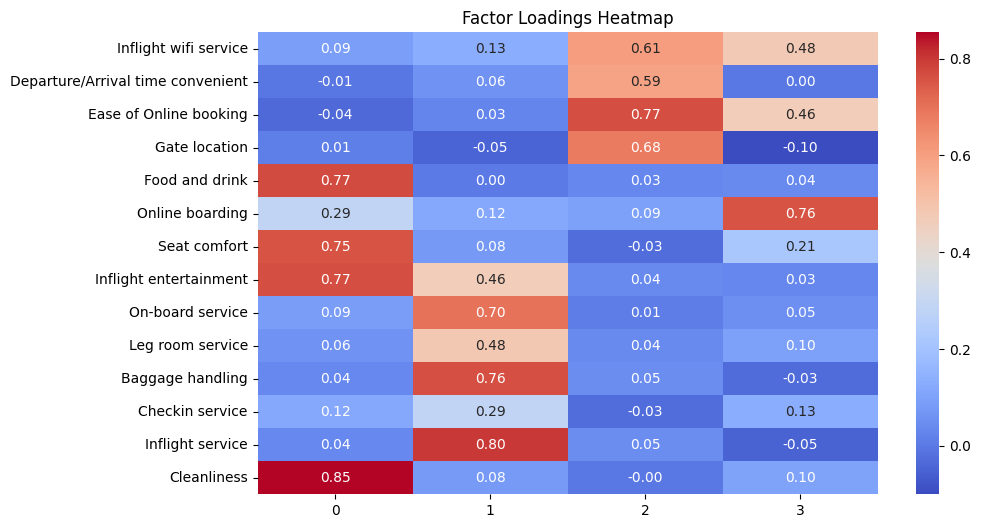

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Factor Loadings Heatmap')
plt.show()

## **Factor Analysis Results**

### **Factor 1** 

* **Food and drink** loads highly (0.77)
* **Seat comfort** loads highly (0.75)
* **Inflight entertainment** loads highly (0.77)
* **Cleanliness** loads very highly (0.85)

**Conclusion for Factor 1**:

* This factor is related to the comfort and quality of in-flight services.
* It could be interpreted as **"In-flight Service Quality"**.

### **Factor 2**

* **On-board service** loads highly (0.70)
* **Baggage handling** loads very highly (0.76)
* **Inflight service** loads very highly (0.80)
* **Leg room service** moderately loads (0.48)

**Conclusion for Factor 2**:

* This factor focuses on services related to pre-flight and passenger assistance.
* It may be defined as **"Ground Service and Passenger Assistance"**.

### **Factor 3**

* **Ease of Online booking** loads very highly (0.77)
* **Gate location** loads highly (0.68)
* **Departure/Arrival time convenient** loads moderately (0.59)
* **Inflight wifi service** moderately loads (0.61)

**Conclusion for Factor 3**:

* This factor is focused on **travel convenience**, including booking, departure/arrival times, and gate location.
* It could be defined as **"Travel Convenience and Organization"**.

### **Factor 4**

* **Online boarding** loads very highly (0.76)
* **Ease of Online booking** moderately loads (0.46)

**Conclusion for Factor 4**:

* This factor is related to digital services provided by the airline, such as online check-in and booking.
* It may be defined as **"Digital Services and Self-service"**.

